In [3]:
#bài 1
import cv2
import numpy as np

# Đọc ảnh gốc
image = cv2.imread('bird.png') 

# Tách các kênh màu: B = Blue, G = Green, R = Red
B, G, R = cv2.split(image)

# Tạo ảnh chỉ có kênh đỏ (R)
red_image = cv2.merge([np.zeros_like(B), np.zeros_like(G), R])

# Tạo ảnh chỉ có kênh xanh lá (G)
green_image = cv2.merge([np.zeros_like(B), G, np.zeros_like(R)])

# Tạo ảnh chỉ có kênh xanh dương (B)
blue_image = cv2.merge([B, np.zeros_like(G), np.zeros_like(R)])

# Lưu ảnh ra tệp
cv2.imwrite('red_bird.png', red_image)
cv2.imwrite('green_bird.png', green_image)
cv2.imwrite('blue_bird.png', blue_image)

print("Ảnh đã được lưu thành công.")


Ảnh đã được lưu thành công.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


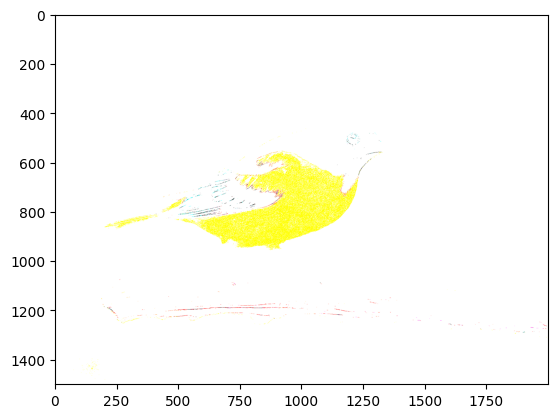

In [8]:
#bài 2
import numpy as np
import imageio.v2 as iio    
import matplotlib.pylab as plt      
import colorsys

rgb=iio.imread('bird.png')
rgb2hsv= np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2])
h*=h
hsv2rgb=np.vectorize(colorsys.hsv_to_rgb)
rgb2=hsv2rgb(h,s,v)
rgb2=np.array(rgb2).transpose((1,2,0))
plt.imshow(rgb2)
plt.show()

In [ ]:
#bài 3
import cv2
import numpy as np

# Đọc ảnh màu
image = cv2.imread('bird.png')  

# Chuyển sang HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Tách kênh H, S, V
H, S, V = cv2.split(hsv)

# Ảnh chỉ chứa kênh H (giữ H, S=0, V=0)
H_img = cv2.merge([H, np.zeros_like(S), np.zeros_like(V)])

# Ảnh chỉ chứa kênh S (giữ S, H=0, V=0)
S_img = cv2.merge([np.zeros_like(H), S, np.zeros_like(V)])

# Ảnh chỉ chứa kênh V (giữ V, H=0, S=0)
V_img = cv2.merge([np.zeros_like(H), np.zeros_like(S), V])

# Ở đây ta chuyển lại sang BGR để lưu ảnh dễ nhìn

cv2.imwrite('H_bird.png', cv2.cvtColor(H_img, cv2.COLOR_HSV2BGR))
cv2.imwrite('S_bird.png', cv2.cvtColor(S_img, cv2.COLOR_HSV2BGR))
cv2.imwrite('V_bird.png', cv2.cvtColor(V_img, cv2.COLOR_HSV2BGR))

print("Đã lưu 3 ảnh tương ứng kênh H, S, V.")


Đã lưu 3 ảnh tương ứng kênh H, S, V.


In [12]:
#bài4   
import cv2
import numpy as np

# Đọc ảnh
image = cv2.imread('bird.png') 

# Chuyển sang HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.float32)

# Tách kênh H, S, V
H, S, V = cv2.split(hsv)

# Xử lý kênh H và V theo yêu cầu
H_new = H / 3.0          # H mới bằng 1/3 H cũ
V_new = V * 0.75         # V mới bằng 3/4 V cũ

# Do H trong OpenCV nằm trong [0,179], đảm bảo giá trị không vượt giới hạn
H_new = np.clip(H_new, 0, 179)

# V nằm trong [0,255], cũng giới hạn trong khoảng này
V_new = np.clip(V_new, 0, 255)

# Gộp lại các kênh (chuyển về uint8)
hsv_new = cv2.merge([H_new.astype(np.uint8), S.astype(np.uint8), V_new.astype(np.uint8)])

# Chuyển về BGR để lưu và hiển thị
bgr_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)

# Lưu ảnh kết quả
cv2.imwrite('bai4.jpg', bgr_new)

print("Đã lưu ảnh mới với H mới = 1/3 H cũ và V mới = 3/4 V cũ.")


Đã lưu ảnh mới với H mới = 1/3 H cũ và V mới = 3/4 V cũ.


In [18]:
#bài 5
import cv2
import os

# Thư mục chứa ảnh gốc và thư mục để lưu ảnh đã xử lý
input_dir = 'exercise'
output_dir = 'exrcise_mean_filter_bai5'

# Tạo thư mục đầu ra nếu chưa có
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các file trong thư mục
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Đọc ảnh
        img = cv2.imread(input_path)

        if img is None:
            print(f"Không thể đọc ảnh: {filename}")
            continue

        # Áp dụng mean filter với kernel 5x5
        filtered = cv2.blur(img, (5, 5))

        # Lưu ảnh đã lọc
        cv2.imwrite(output_path, filtered)
        print(f"Đã xử lý: {filename}")

print("Hoàn tất lọc ảnh với mean filter.")


Đã xử lý: baby.jpeg
Đã xử lý: balloons_noisy.png
Đã xử lý: flower.jpeg
Hoàn tất lọc ảnh với mean filter.


In [ ]:
#bài 6
import cv2
import numpy as np
import os

# Thư mục
input_dir = 'exercise'
output_dir = 'exercise_bai6'
ground_truth_dir = 'ground_truth'  # nếu có ảnh gốc để tính PSNR
has_ground_truth = os.path.exists(ground_truth_dir)

# Tạo thư mục lưu ảnh kết quả
filters = ['mean', 'median', 'max', 'min']
for f in filters:
    os.makedirs(os.path.join(output_dir, f), exist_ok=True)

# Hàm tính PSNR
def calculate_psnr(original, filtered):
    mse = np.mean((original.astype(np.float32) - filtered.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# Hàm thực hiện max filter và min filter
def apply_custom_filter(image, mode='max', ksize=3):
    if len(image.shape) == 3:  # ảnh màu
        channels = cv2.split(image)
        result = []
        for c in channels:
            if mode == 'max':
                filtered = cv2.dilate(c, np.ones((ksize, ksize), np.uint8))
            elif mode == 'min':
                filtered = cv2.erode(c, np.ones((ksize, ksize), np.uint8))
            result.append(filtered)
        return cv2.merge(result)
    else:
        if mode == 'max':
            return cv2.dilate(image, np.ones((ksize, ksize), np.uint8))
        else:
            return cv2.erode(image, np.ones((ksize, ksize), np.uint8))

# Lặp qua ảnh trong thư mục exercise/
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        img_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Không đọc được ảnh: {filename}")
            continue

        # Mean filter
        mean = cv2.blur(img, (5, 5))
        cv2.imwrite(os.path.join(output_dir, 'mean', filename), mean)

        # Median filter
        median = cv2.medianBlur(img, 5)
        cv2.imwrite(os.path.join(output_dir, 'median', filename), median)

        # Max filter
        maxf = apply_custom_filter(img, mode='max', ksize=5)
        cv2.imwrite(os.path.join(output_dir, 'max', filename), maxf)

        # Min filter
        minf = apply_custom_filter(img, mode='min', ksize=5)
        cv2.imwrite(os.path.join(output_dir, 'min', filename), minf)

        # Nếu có ảnh gốc để so sánh PSNR
        if has_ground_truth:
            gt_path = os.path.join(ground_truth_dir, filename)
            gt = cv2.imread(gt_path)

            if gt is not None and gt.shape == img.shape:
                psnr_mean = calculate_psnr(gt, mean)
                psnr_median = calculate_psnr(gt, median)
                psnr_max = calculate_psnr(gt, maxf)
                psnr_min = calculate_psnr(gt, minf)

                print(f"[{filename}] PSNR - Mean: {psnr_mean:.2f}, Median: {psnr_median:.2f}, Max: {psnr_max:.2f}, Min: {psnr_min:.2f}")
            else:
                print(f"Không tìm thấy hoặc ảnh gốc không khớp: {filename}")

print("✅ Đã hoàn tất lọc ảnh và (nếu có) so sánh PSNR.")



✅ Đã hoàn tất lọc ảnh và (nếu có) so sánh PSNR.


<!-- | Filter     | Ưu điểm                                 | Khuyết điểm                  |
| ---------- | --------------------------------------- | ---------------------------- |
| **Mean**   | Làm mượt tốt, đơn giản                  | Làm mờ ảnh                   |
| **Median** | Rất tốt với nhiễu muối tiêu             | Chậm hơn                     |
| **Max**    | Tốt để loại bỏ nhiễu tối (black noise)  | Có thể làm mất chi tiết sáng |
| **Min**    | Tốt để loại bỏ nhiễu sáng (white noise) | Có thể làm mất chi tiết tối  | -->


In [19]:
#bài 7
import cv2
import os
import numpy as np

# Thư mục chứa ảnh gốc
input_dir = 'exercise'
output_dir = 'exercise_bai7'

# Tạo thư mục con cho từng bộ lọc
filters = ['sobel', 'laplacian', 'canny']
for f in filters:
    os.makedirs(os.path.join(output_dir, f), exist_ok=True)

# Lặp qua ảnh trong thư mục
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        img_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Không đọc được ảnh: {filename}")
            continue

        # Chuyển sang xám và khử nhiễu trước bằng Gaussian
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        denoised = cv2.GaussianBlur(gray, (5, 5), 1.5)

        # 1. Sobel (biên theo cả x và y)
        sobelx = cv2.Sobel(denoised, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(denoised, cv2.CV_64F, 0, 1, ksize=3)
        sobel = cv2.magnitude(sobelx, sobely)
        sobel = np.uint8(np.clip(sobel, 0, 255))
        cv2.imwrite(os.path.join(output_dir, 'sobel', filename), sobel)

        # 2. Laplacian
        lap = cv2.Laplacian(denoised, cv2.CV_64F)
        lap = np.uint8(np.clip(np.absolute(lap), 0, 255))
        cv2.imwrite(os.path.join(output_dir, 'laplacian', filename), lap)

        # 3. Canny
        canny = cv2.Canny(denoised, 100, 200)
        cv2.imwrite(os.path.join(output_dir, 'canny', filename), canny)

        print(f"✔ Đã xử lý ảnh: {filename}")

print("✅ Hoàn tất xác định biên và lưu ảnh kết quả vào thư mục edges/")


✔ Đã xử lý ảnh: baby.jpeg
✔ Đã xử lý ảnh: balloons_noisy.png
✔ Đã xử lý ảnh: flower.jpeg
✅ Hoàn tất xác định biên và lưu ảnh kết quả vào thư mục edges/


In [21]:
#bài8
import cv2
import numpy as np
import os
import random

# Thư mục đầu vào và đầu ra
input_dir = 'exercise_bai6/max/'
output_dir = 'random_rgb_bai8'
os.makedirs(output_dir, exist_ok=True)

# Tất cả các hoán vị RGB
permutations = [
    (0, 1, 2),  # RGB
    (0, 2, 1),  # RBG
    (1, 0, 2),  # GRB
    (1, 2, 0),  # GBR
    (2, 0, 1),  # BRG
    (2, 1, 0),  # BGR
]

# Lặp qua từng ảnh trong thư mục
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        input_path = os.path.join(input_dir, filename)
        img = cv2.imread(input_path)

        if img is None:
            print(f"Không đọc được ảnh: {filename}")
            continue

        # Hoán đổi màu RGB ngẫu nhiên
        perm = random.choice(permutations)
        img_shuffled = img[:, :, list(perm)]

        # Lưu ảnh kết quả
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, img_shuffled)
        print(f"✔ Đã đổi màu và lưu: {filename} với hoán vị RGB {perm}")

print("✅ Đã hoàn tất đổi màu RGB ngẫu nhiên và lưu các ảnh.")


✔ Đã đổi màu và lưu: baby.jpeg với hoán vị RGB (2, 0, 1)
✔ Đã đổi màu và lưu: balloons_noisy.png với hoán vị RGB (2, 1, 0)
✔ Đã đổi màu và lưu: flower.jpeg với hoán vị RGB (2, 0, 1)
✅ Đã hoàn tất đổi màu RGB ngẫu nhiên và lưu các ảnh.


In [22]:
import cv2
import os
import numpy as np
import random

# Thư mục đầu vào và đầu ra
input_dir = 'exercise_bai6/min/'
output_dir = 'random_hsv_bai9'
os.makedirs(output_dir, exist_ok=True)

# Các hoán vị có thể của 3 kênh HSV
permutations = [
    (0, 1, 2),  # HSV
    (0, 2, 1),  # HV S
    (1, 0, 2),  # SHV
    (1, 2, 0),  # SVH
    (2, 0, 1),  # VHS
    (2, 1, 0),  # VSH
]

# Duyệt qua từng ảnh
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        img_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Không đọc được ảnh: {filename}")
            continue

        # Chuyển sang HSV
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Hoán đổi các kênh HSV ngẫu nhiên
        perm = random.choice(permutations)
        hsv_shuffled = hsv[:, :, list(perm)]

        # Chuyển ngược về BGR để lưu
        img_shuffled = cv2.cvtColor(hsv_shuffled, cv2.COLOR_HSV2BGR)

        # Lưu kết quả
        save_path = os.path.join(output_dir, filename)
        cv2.imwrite(save_path, img_shuffled)
        print(f"✔ {filename} - HSV hoán vị {perm}")

print("✅ Hoàn tất đổi màu HSV ngẫu nhiên và lưu ảnh.")


✔ baby.jpeg - HSV hoán vị (0, 1, 2)
✔ balloons_noisy.png - HSV hoán vị (1, 2, 0)
✔ flower.jpeg - HSV hoán vị (1, 0, 2)
✅ Hoàn tất đổi màu HSV ngẫu nhiên và lưu ảnh.
